In [1]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

df_train = pd.read_csv('C:/Users/cod/Desktop/train.csv')
df_test = pd.read_csv('C:/Users/cod/Desktop/test.csv')
df_train['FamilySize'] = df_test['SibSp'] + df_train['Parch']+1
df_test["FamilySize"] = df_test['SibSp'] + df_test['Parch']

df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i>0 else 0)

In [2]:
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')
#.str : string 변환 extract : 식으로 추출
#[A-Za-z]==[a-zA-Z] : 문자열 전체
#[0-9] : 숫자 전체
#. : 모든 문자


In [3]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T
#.T : 전치

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [4]:
pd.crosstab(df_test['Initial'], df_test['Sex']).T

Initial,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
Sex,,,,,,,,,
female,0,1,0,0,78,0,72,1,0
male,2,0,1,21,0,240,0,0,2


In [5]:
df_train['Initial'].replace(['Mile','Mme','Ms','Dr','Major','Lady',
                            'Countess','Jonkheer','Col','Rev','Capt',
                            'Sir','Don','Dona'],
                            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs',
                            'Other','Other','Other','Mr','Mr','Mr','Mr'],
                            inplace=True)
df_test['Initial'].replace(['Mile','Mme','Ms','Dr','Major','Lady',
                            'Countess','Jonkheer','Col','Rev','Capt',
                            'Sir','Don','Dona'],
                            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs',
                            'Other','Other','Other','Mr','Mr','Mr','Mr'],
                            inplace=True)

In [6]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,2.652174
Miss,408.864130,0.701087,2.298913,21.831081,0.706522,0.543478,3.113425,1.754902
Mlle,676.500000,1.000000,1.000000,24.000000,0.000000,0.000000,4.070251,NaN
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.676724
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.224138
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.666667


<AxesSubplot:xlabel='Initial'>

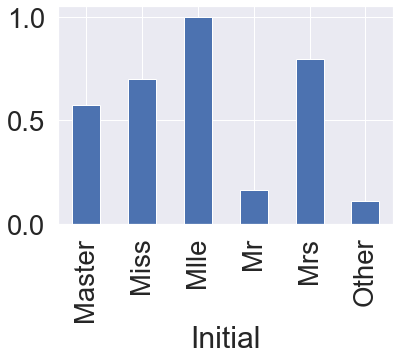

In [7]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()
#plotly의 bar chart

In [8]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age']=36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age']=5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age']=24
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age']=46

df_test.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age']=36
df_test.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age']=5
df_test.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age']=24
df_test.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age']=46

In [9]:
print('Embarked has', sum(df_train['Embarked'].isnull()),'Null valuues')

Embarked has 2 Null valuues


In [10]:
df_train['Embarked'].fillna('S',inplace=True)

In [11]:
df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

In [12]:
def category_age(x):
    if x<10:
        return 0
    elif x<20:
        return 1
    elif x<30:
        return 2
    elif x<40:
        return 3
    elif x<50:
        return 4
    elif x<60:
        return 5
    elif x<70:
        return 6
    return 7

df_train['Age_cat_2'] = df_train['Age'].apply(category_age)
#apply(function)


In [13]:
def check():
    if (df_train['Age_cat']==df_train['Age_cat_2']).all():
        return True
    return False

In [14]:
check()

True

In [15]:
df_train.drop(['Age','Age_cat_2'],axis=1,inplace=True)
df_test.drop(['Age'],axis=1,inplace=True)

In [16]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss':1,
                                               'Mr':2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master':0,'Miss':1,
                                            'Mr':2, 'Mrs': 3, 'Other' : 4})

In [17]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [18]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0,'Q':1,'S':2})

In [20]:
df_train['Embarked'].isnull().any()

False

In [21]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

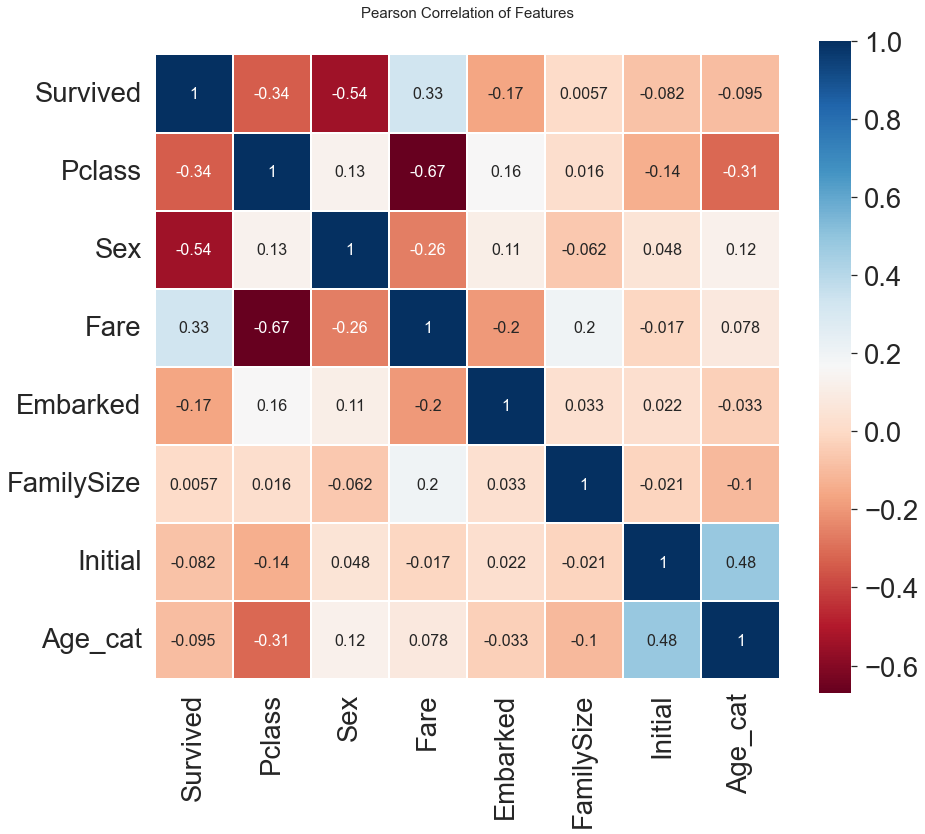

In [22]:
heatmap_data = df_train[['Survived','Pclass','Sex','Fare','Embarked',
                        'FamilySize','Initial','Age_cat']]
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features',y=1.05,size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white',annot=True
            ,annot_kws={'size':16})

del heatmap_data

In [23]:
df_train = pd.get_dummies(df_train,columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test,columns=['Initial'], prefix= 'Initial')

In [24]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0.0,Initial_1.0,Initial_2.0,Initial_3.0,Initial_4.0
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,1.0,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2.0,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1.0,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,1.0,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,2.0,3,0,0,1,0,0


In [25]:
df_train = pd.get_dummies(df_train,columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test,columns=['Embarked'],prefix='Embarked')

In [26]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_cat,Initial_0.0,Initial_1.0,Initial_2.0,Initial_3.0,Initial_4.0,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,1.0,2,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,2.0,3,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,1.0,2,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,1.0,3,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2.0,3,0,0,1,0,0,0,0,1


In [27]:
df_train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],
             axis=1,inplace=True)
df_test.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],
            axis=1, inplace=True)
df_test.loc[df_test.Fare.isnull(),'Fare']=df_test['Fare'].mean()

In [28]:
df_train.head()


,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0.0,Initial_1.0,Initial_2.0,Initial_3.0,Initial_4.0,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,1.0,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2.0,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1.0,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,1.0,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,2.0,3,0,0,1,0,0,0,0,1


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [32]:
x_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
x_test = df_test.values

In [33]:
x_tr,x_vld,y_tr,y_vld = train_test_split(x_train,target_label,
                                         test_size=0.3,random_state=2018)

In [34]:
model=RandomForestClassifier()
model.fit(x_tr,y_tr)
prediction = model.predict(x_vld)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [119]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [114]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0],
                        100*metrics.accuracy_score(prediction, y_vld)))

NameError: name 'prediction' is not defined